# Assigning additive DMS phenotypes to 10x data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/0w/l84hyz3n6ns582pxy6tkt8y80000gn/T/ipykernel_54843/265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Load data

In [2]:
# 10-week:
# pd.read_csv("data/10x/10week/filtered_contig_annotations.csv")

In [3]:
dfs = (
    pd.read_csv("data/10x/Timecourse_Novaseqvdj/Data/AV1_VDJ_res/filtered_contig_annotations.csv"),
    pd.read_csv("data/10x/Timecourse_Novaseqvdj/Data/AV2_VDJ_res/filtered_contig_annotations.csv"),
    pd.read_csv("data/10x/Timecourse_Novaseqvdj/Data/AV3_VDJ_res/filtered_contig_annotations.csv"),
    pd.read_csv("data/10x/10week/filtered_contig_annotations.csv"),  # 10-week
    )
for i in range(len(dfs)):
    dfs[i]['library'] = i + 1
df = pd.concat(dfs).reset_index(drop=True)

df

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,...,cdr3_nt,fwr4,fwr4_nt,reads,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id,library,sequence
0,AAACCTGAGAATCTCC-1,True,AAACCTGAGAATCTCC-1_contig_1,True,504,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,TGTCAGCAATATAACAGCTATCCTCTCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAGCTAGAAATAAAAC,1805,41,clonotype1,clonotype1_consensus_2,1999,1,NaN
1,AAACCTGAGAATCTCC-1,True,AAACCTGAGAATCTCC-1_contig_2,True,527,IGH,IGHV3-8,NaN,IGHJ1,IGHG2B,...,TGTGCAAGGGACTTCGATGTCTGG,GAGTTVTVSS,GGCGCAGGGACCACGGTCACCGTCTCCTCAG,92,6,clonotype1,clonotype1_consensus_1,1999,1,NaN
2,AAACCTGAGATGTTAG-1,True,AAACCTGAGATGTTAG-1_contig_1,True,671,IGH,IGHV3-8,NaN,IGHJ1,IGHM,...,TGTGCAAGGGACTTCGATGTCTGG,GAGTTVTVSS,GGCGCAGGGACCACGGTCACCGTCTCCTCAG,132,9,clonotype1,clonotype1_consensus_1,1569,1,NaN
3,AAACCTGAGATGTTAG-1,True,AAACCTGAGATGTTAG-1_contig_2,True,525,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,TGTCAGCAATATAACAGCTATCCTCCCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAGCTAGAAATAAAAC,2069,53,clonotype1,clonotype1_consensus_2,1569,1,NaN
4,AAACCTGAGCCGCCTA-1,True,AAACCTGAGCCGCCTA-1_contig_1,True,531,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,TGTCAGCAATATAACAGCTATCCTCTCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAGCTAGAAATAAAAC,2413,55,clonotype1,clonotype1_consensus_2,26,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38960,TTTGTCATCTCAAACG-1,True,TTTGTCATCTCAAACG-1_contig_2,True,518,IGK,IGKV2-137,NaN,IGKJ4,IGKC,...,TGTATGCAACATCTAGAATATCCTTTCACGTTC,GSGTKLEIK,GGCTCGGGGACAAAGTTGGAAATAAAAC,529,56,clonotype7671,clonotype7671_consensus_2,1,4,GATATTGTGATGACTCAGGCTGCACCCTCTGTACCTGTCACTCCTG...
38961,TTTGTCATCTGGAGCC-1,True,TTTGTCATCTGGAGCC-1_contig_1,True,497,IGK,IGKV14-100,NaN,IGKJ5,IGKC,...,TGTGTACAGTATGCTCAGTTTCCGCTCACGTTC,GAGTKLELK,GGTGCTGGGACCAAGCTGGAGCTGAAAC,377,40,clonotype151,clonotype151_consensus_2,1,4,GACATCCTGATGACCCAATCTCCATCCTCCATGTCTGTATCTCTGG...
38962,TTTGTCATCTGGAGCC-1,True,TTTGTCATCTGGAGCC-1_contig_2,True,669,IGH,IGHV1-72,NaN,IGHJ2,IGHD,...,TGTGCAAGAGAGGGATGGTTCATCTTTGACTACTGG,GQGTTLTVSS,GGCCAAGGCACCACTCTCACAGTCTCCTCAG,119,9,clonotype151,clonotype151_consensus_1,1,4,CAGGTCCAACTGCAGCAGCCTGGGGCTGAGCTTGTGAAGCCTGGGG...
38963,TTTGTCATCTGGGCCA-1,True,TTTGTCATCTGGGCCA-1_contig_1,True,503,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,TGTCACCAATATAAGAACTATCCTATCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAACTAGAAATCAAAC,477,39,clonotype1,clonotype1_consensus_2,1286,4,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...


### Barcode multiplicity

Most are multiplicity two, for paired heavy and light chains from single cells.

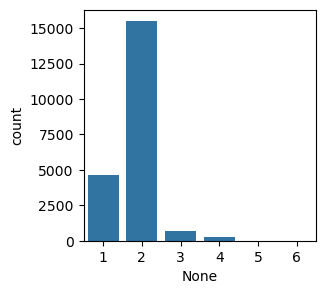

In [4]:
plt.figure(figsize=(3, 3))
sns.countplot(x=df.groupby("barcode").size())
# plt.yscale("log")
plt.show()


Filter to only barcodes with multiplicity two.

In [5]:
df = df.groupby("barcode").filter(lambda x: len(x.index) == 2)

## Load DMS data

Note: pulling DMS scores from the newer tite-seq modeling branch

In [6]:
# dms_df = pd.read_csv("https://media.githubusercontent.com/media/jbloomlab/Ab-CGGnaive_DMS/main/results/final_variant_scores/final_variant_scores.csv", index_col="mutation", dtype=dict(position_IMGT=pd.Int16Dtype()))
dms_df = pd.read_csv("https://media.githubusercontent.com/media/jbloomlab/Ab-CGGnaive_DMS/improved-Kd-fitting/tite-seq-modeling/output/final_variant_scores.csv", index_col="mutation", dtype=dict(position_IMGT=pd.Int16Dtype()))

In [7]:
# remove linker sites
dms_df = dms_df[dms_df.chain != "link"]
# add indicator for wildtype data
dms_df["WT"] = dms_df.wildtype == dms_df.mutant
assert dms_df.position_IMGT.max() < 1000
dms_df["site"] = [f"{chain}-{str(pos).zfill(3)}" for chain, pos in zip(dms_df.chain, dms_df.position_IMGT)]
dms_df

,target,wildtype,position,position_IMGT,chain,annotation,mutant,codon,single_nt,bind_CGG_old,...,n_bc_expr,n_libs_expr,psr,delta_psr,n_bc_psr,n_libs_psr,bind_CGG,delta_bind_CGG,WT,site
mutation,,,,,,,,,,,,,,,,,,,,,
E1(H)A,CGG_naive,E,1,1,H,FWRH1,A,GAG,True,10.48829,...,19.0,2.0,6.78608,-0.07452,17.0,2.0,8.743409,0.118716,False,H-001
E1(H)C,CGG_naive,E,1,1,H,FWRH1,C,GAG,False,10.44477,...,20.0,2.0,7.44234,0.58174,17.0,2.0,8.608721,-0.015972,False,H-001
E1(H)D,CGG_naive,E,1,1,H,FWRH1,D,GAG,True,10.42771,...,16.0,2.0,6.95940,0.09880,13.0,2.0,8.636242,0.011550,False,H-001
E1(H)E,CGG_naive,E,1,1,H,FWRH1,E,GAG,True,10.45719,...,21170.0,2.0,6.86060,0.00000,18910.0,2.0,NaN,NaN,True,H-001
E1(H)F,CGG_naive,E,1,1,H,FWRH1,F,GAG,False,10.51899,...,24.0,2.0,6.91372,0.05313,21.0,2.0,8.758316,0.133624,False,H-001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R128(L)S,CGG_naive,R,235,128,L,FWRL4,S,CGT,True,10.44756,...,39.0,2.0,6.93925,0.07866,33.0,2.0,8.634747,0.010054,False,L-128
R128(L)T,CGG_naive,R,235,128,L,FWRL4,T,CGT,False,10.43023,...,36.0,2.0,6.88956,0.02896,34.0,2.0,8.644639,0.019946,False,L-128
R128(L)V,CGG_naive,R,235,128,L,FWRL4,V,CGT,False,10.38231,...,27.0,2.0,6.78160,-0.07899,24.0,2.0,8.589500,-0.035193,False,L-128


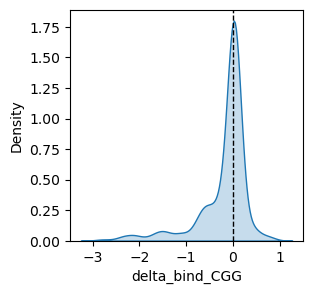

In [8]:
plt.figure(figsize=(3, 3))
sns.kdeplot(data=dms_df.query("single_nt"), x="delta_bind_CGG", fill=True)
plt.axvline(0, color="k", linestyle="--", lw=1)
plt.show()

### Load naive sequence with IMGT numbering

In [9]:
pos_df = pd.read_csv("https://raw.githubusercontent.com/jbloomlab/Ab-CGGnaive_DMS/main/data/CGGnaive_sites.csv", dtype=dict(site=pd.Int16Dtype()), index_col="site_scFv")
pos_df

,amino_acid,chain,site,KI_codon,annotation
site_scFv,,,,,
1,E,H,1,GAG,FWRH1
2,V,H,2,GTG,FWRH1
3,Q,H,3,CAG,FWRH1
4,L,H,4,CTT,FWRH1
5,Q,H,5,CAG,FWRH1
...,...,...,...,...,...
231,L,L,124,CTA,FWRL4
232,E,L,125,GAA,FWRL4
233,I,L,126,ATA,FWRL4


In [10]:
naive_H = "".join(pos_df.query("chain == 'H'").amino_acid)
naive_H, len(naive_H)

('EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLEYMGYISYSGSTYYNPSLKSRISITRDTSKNQYYLQLNSVTTEDTATYYCARDFDVWGAGTTVTVSS',
 112)

In [11]:
# note extra R at end of scFv sequence, which we exclude below
naive_L = "".join(pos_df.query("chain == 'L'").amino_acid)[:-1]
naive_L, len(naive_L)

('DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKALIYSASYRYSGVPDRFTGSGSGTDFTLTISNVQSEDLAEYFCQQYNSYPLTFGSGTKLEIK',
 107)

### Add full length amino-acid and nucleotide sequence to the 10x data frame

In [12]:
df["aa_seq"] = df.fwr1 + df.cdr1 + df.fwr2 + df.cdr2 + df.fwr3 + df.cdr3 + df.fwr4
df["nt_seq"] = df.fwr1_nt + df.cdr1_nt + df.fwr2_nt + df.cdr2_nt + df.fwr3_nt + df.cdr3_nt + df.fwr4_nt

### Distribution of sequence lengths

/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key

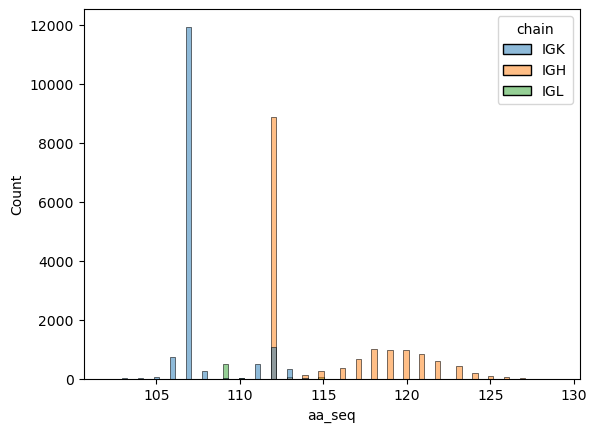

In [13]:
sns.histplot(x=df.aa_seq.str.len(), hue=df.chain)
# plt.yscale("log")
plt.show()

In [14]:
df.aa_seq.str.len().value_counts()

aa_seq
107    11934
112     9960
118      995
119      970
120      969
121      828
106      741
117      665
122      607
109      524
111      488
113      421
123      417
116      363
115      305
108      245
124      191
114      133
125       99
105       55
126       53
110       41
127       22
104       14
103       11
128        6
129        2
102        1
Name: count, dtype: int64

Filter to only sequences with the expected length of each chain

In [15]:
# Filter to only sequences with the expected length of each chain
df = df.loc[((df.chain == 'IGH') & (df.aa_seq.str.len() == len(naive_H))) | ((df.chain == 'IGK') & (df.aa_seq.str.len() == len(naive_L)))].reset_index(drop=True)

## Assign amino-acid mutations and additive phenotypes to 10x sequences

**Note**: we do not attempt to pair heavy and light chains from the same cell, so phenotypes are assigned to each chain independently.
Under an additive model, the values for each chain can be added to get the phenotype for the BCR

In [16]:
def get_mutations(naive_aa, aa, pos_map, chain_annotation):
    assert len(naive_aa) == len(aa)
    return [f"{aa1}{pos_map[pos]}{chain_annotation}{aa2}"
            for pos, (aa1, aa2) in enumerate(zip(naive_aa, aa))
            if aa1 != aa2]

In [17]:
pos_map_H = pos_df.loc[pos_df.chain == "H", "site"].reset_index(drop=True)
pos_map_L = pos_df.loc[pos_df.chain == "L", "site"].reset_index(drop=True)

In [18]:
for idx in df.index:
     if df.chain[idx] == "IGH":
          mutations = get_mutations(naive_H, df.aa_seq[idx], pos_map_H, "(H)")          
     elif df.chain[idx] == "IGK":
          mutations = get_mutations(naive_L, df.aa_seq[idx], pos_map_L, "(L)")
     else:
          print(f"skipping unexpected chain length {df.chain[idx]} {len(df.aa_seq[idx])}")
          continue

     df.loc[idx, "mutations"] = ",".join(mutations)
     df.loc[idx, "n_mutations"] = len(mutations)
     df.loc[idx, "delta_bind_CGG"] = dms_df.delta_bind_CGG[mutations].sum()
     df.loc[idx, "delta_expr"] = dms_df.delta_expr[mutations].sum()
     df.loc[idx, "delta_psr"] = dms_df.delta_psr[mutations].sum()

df.n_mutations = df.n_mutations.astype("Int64")

df

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,...,exact_subclonotype_id,library,sequence,aa_seq,nt_seq,mutations,n_mutations,delta_bind_CGG,delta_expr,delta_psr
0,AAACCTGAGAATCTCC-1,True,AAACCTGAGAATCTCC-1_contig_1,True,504,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,1999,1,NaN,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVGWYQQKPGQSPKA...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,A40(L)G,1,0.803875,0.00031,-0.19452
1,AAACCTGAGAATCTCC-1,True,AAACCTGAGAATCTCC-1_contig_2,True,527,IGH,IGHV3-8,NaN,IGHJ1,IGHG2B,...,1999,1,NaN,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,Y67(H)S,1,-0.001580,-0.04634,0.03864
2,AAACCTGAGATGTTAG-1,True,AAACCTGAGATGTTAG-1_contig_1,True,671,IGH,IGHV3-8,NaN,IGHJ1,IGHM,...,1569,1,NaN,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,,0,0.000000,0.00000,0.00000
3,AAACCTGAGATGTTAG-1,True,AAACCTGAGATGTTAG-1_contig_2,True,525,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,1569,1,NaN,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,"G80(L)E,L116(L)P",2,-0.615845,-0.72872,-0.06667
4,AAACCTGAGCCGCCTA-1,True,AAACCTGAGCCGCCTA-1_contig_1,True,531,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,26,1,NaN,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,,0,0.000000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20815,TTTGTCATCCGTAGTA-1,True,TTTGTCATCCGTAGTA-1_contig_1,True,508,IGK,IGKV10-96,NaN,IGKJ2,IGKC,...,1,4,GATATCCAGATGACACAGACTACATCCTCCCTGTCTGCCTCTCTGG...,DIQMTQTTSSLSASLGDRVTISCRASQDISNYLNWYQQKPDGTVKL...,GATATCCAGATGACACAGACTACATCCTCCCTGTCTGCCTCTCTGG...,"V3(L)Q,S7(L)T,Q8(L)T,K9(L)S,F10(L)S,M11(L)L,T1...",43,-2.611344,-1.43348,0.26808
20816,TTTGTCATCCTACAGA-1,True,TTTGTCATCCTACAGA-1_contig_2,True,497,IGK,IGKV5-43,NaN,IGKJ5,IGKC,...,1,4,GATATTGTGCTAACTCAGTCTCCAGCCACCCTGTCTGTGACTCCAG...,DIVLTQSPATLSVTPGDSVSLSCRASQSISNNLHWYQQKSHESPRL...,GATATTGTGCTAACTCAGTCTCCAGCCACCCTGTCTGTGACTCCAG...,"M4(L)L,Q8(L)P,K9(L)A,F10(L)T,M11(L)L,T13(L)V,S...",43,-7.960520,-2.16325,2.82798
20817,TTTGTCATCTGGAGCC-1,True,TTTGTCATCTGGAGCC-1_contig_1,True,497,IGK,IGKV14-100,NaN,IGKJ5,IGKC,...,1,4,GACATCCTGATGACCCAATCTCCATCCTCCATGTCTGTATCTCTGG...,DILMTQSPSSMSVSLGDTVSITCHASQGISSNIGWLQQKPGKSFKG...,GACATCCTGATGACCCAATCTCCATCCTCCATGTCTGTATCTCTGG...,"V3(L)L,Q8(L)P,K9(L)S,F10(L)S,T13(L)V,V15(L)L,R...",43,-3.645951,-1.39536,0.72240
20818,TTTGTCATCTGGGCCA-1,True,TTTGTCATCTGGGCCA-1_contig_1,True,503,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,1286,4,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,"A57(L)T,Q105(L)H,N108(L)K,S109(L)N,L116(L)I",5,1.929274,-0.04742,0.40716


In [19]:
df.query("chain == 'IGH'")['nt_seq'].str.split("", expand=True).iloc[:, 1:-1].apply(pd.Series.value_counts)

def consensus_string(series):
    consensus = ''
    for i in range(len(series.iloc[0])):
        # Get the ith character of each string in the series
        chars = series.apply(lambda x: x[i])
        # Find the most frequent character at this position
        consensus += chars.mode()[0]
    return consensus

# Apply the function to the series
bar = consensus_string(df.query("chain == 'IGH'")['nt_seq'])

## Pair heavy and light seqs

In [20]:
df = df.query("chain == 'IGH'").merge(df.query("chain == 'IGK'"), on=["barcode", "library"], how="inner", suffixes=("_H", "_L"))

df["delta_bind_CGG"] = df.delta_bind_CGG_H + df.delta_bind_CGG_L
df["delta_expr"] = df.delta_expr_H + df.delta_expr_L
df["delta_psr"] = df.delta_psr_H + df.delta_psr_L
df["n_mutations"] = df.n_mutations_H + df.n_mutations_L
df["nt_seq"] = df.nt_seq_H + df.nt_seq_L

Plot mutation counts

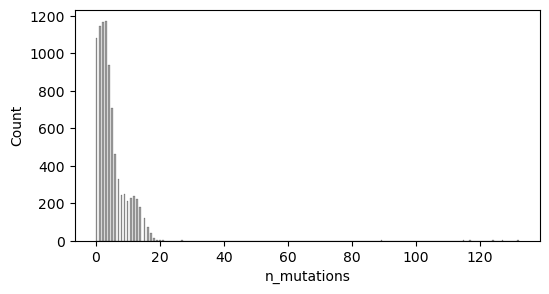

In [21]:
plt.figure(figsize=(6, 3))
sns.histplot(x=df.n_mutations, color="grey")
plt.show()

Filter the very large mutation sequence as a probable error

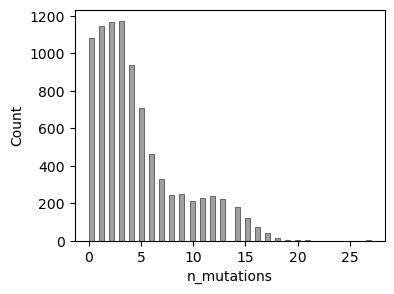

In [22]:
df = df.query("n_mutations < 50").reset_index(drop=True)

plt.figure(figsize=(4, 3))
sns.histplot(x=df.n_mutations, color="grey")
plt.show()

In [23]:
assert set((df.aa_seq_H + df.aa_seq_L).str.len().unique()) == {len(naive_H) + len(naive_L)}

## Read metadata on mice/times

In [24]:
metadata = pd.read_excel("data/10x/Timecourse_Novaseqvdj/AV_VDJ_GEX_metadata.xlsx")[["Unnamed: 0", "orig.ident", "Timecourse", "Mouse.ID"]]
metadata["barcode"] = metadata["Unnamed: 0"].str.split("_").str[0]
metadata["library"] = metadata["orig.ident"].str[-1].astype(int)
metadata["time (days)"] = metadata.Timecourse.str.split("Day").str[1].astype(int)
metadata["mouse"] = "D" + metadata.Timecourse.str.split("Day").str[-1] + metadata["Mouse.ID"]
metadata.drop(columns=["Unnamed: 0", "orig.ident", "Mouse.ID", "Timecourse"], inplace=True)

metadata

,barcode,library,time (days),mouse
0,AAACCTGAGAATCTCC-1,1,14,D14M1
1,AAACCTGAGCCGCCTA-1,1,8,D8M1
2,AAACCTGAGTGCGTGA-1,1,11,D11M1
3,AAACCTGCAAATACAG-1,1,17,D17M1
4,AAACCTGCAGTACACT-1,1,8,D8M4
...,...,...,...,...
9740,TTTGTCACACGACGAA-1,3,14,D14M3
9741,TTTGTCACATACTACG-1,3,11,D11M3
9742,TTTGTCAGTTCCGTCT-1,3,11,D11M3
9743,TTTGTCATCATGGTCA-1,3,17,D17M4


In [25]:
metadata_10wk = pd.read_excel("data/10x/10week/AV10.GC_metadata.xlsx")[["Unnamed: 0", "hash.ID"]].rename(columns={"Unnamed: 0": "barcode", "hash.ID": "mouse"})
metadata_10wk["library"] = 4
metadata_10wk["time (days)"] = 70
metadata_10wk["time (days)"] = metadata_10wk["time (days)"].astype(int)

number_map = {"One": "1", "Two": "2", "Three": "3", "Four": "4", "Five": "5", "Six": "6", "Seven": "7", "Eight": "8", "Nine": "9"}
metadata_10wk.mouse = metadata_10wk.apply(lambda x: f"D{x['time (days)']}M{number_map[x.mouse]}", axis=1)
# note: barcodes overlap with other libraries
# metadata_10wk.barcode.isin(metadata.barcode).sum()

metadata = pd.concat([metadata, metadata_10wk]).reset_index(drop=True)
metadata

,barcode,library,time (days),mouse
0,AAACCTGAGAATCTCC-1,1,14,D14M1
1,AAACCTGAGCCGCCTA-1,1,8,D8M1
2,AAACCTGAGTGCGTGA-1,1,11,D11M1
3,AAACCTGCAAATACAG-1,1,17,D17M1
4,AAACCTGCAGTACACT-1,1,8,D8M4
...,...,...,...,...
12412,TTTGGTTTCGGCATCG-1,4,70,D70M8
12413,TTTGGTTTCTCCCTGA-1,4,70,D70M6
12414,TTTGTCAAGCGGCTTC-1,4,70,D70M8
12415,TTTGTCAAGTAGGTGC-1,4,70,D70M9


Merge with sequence data on barcode and library

In [26]:
df = df.merge(metadata, how="inner", on=["barcode", "library"])
df

,barcode,is_cell_H,contig_id_H,high_confidence_H,length_H,chain_H,v_gene_H,d_gene_H,j_gene_H,c_gene_H,...,delta_bind_CGG_L,delta_expr_L,delta_psr_L,delta_bind_CGG,delta_expr,delta_psr,n_mutations,nt_seq,time (days),mouse
0,AAACCTGAGAATCTCC-1,True,AAACCTGAGAATCTCC-1_contig_2,True,527,IGH,IGHV3-8,NaN,IGHJ1,IGHG2B,...,0.803875,0.00031,-0.19452,0.802294,-0.04603,-0.15588,2,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,14,D14M1
1,AAACCTGAGCCGCCTA-1,True,AAACCTGAGCCGCCTA-1_contig_2,True,542,IGH,IGHV3-8,NaN,IGHJ1,IGHG1,...,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,8,D8M1
2,AAACCTGCAGTACACT-1,True,AAACCTGCAGTACACT-1_contig_1,True,671,IGH,IGHV3-8,NaN,IGHJ1,IGHM,...,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,8,D8M4
3,AAACCTGGTCCGACGT-1,True,AAACCTGGTCCGACGT-1_contig_1,True,661,IGH,IGHV3-8,NaN,IGHJ1,IGHM,...,0.803875,0.00031,-0.19452,0.803875,0.00031,-0.19452,1,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,11,D11M1
4,AAACCTGTCTTAACCT-1,True,AAACCTGTCTTAACCT-1_contig_1,True,672,IGH,IGHV3-8,NaN,IGHJ1,IGHM,...,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,11,D11M1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6905,TTTGGTTCAATGCCAT-1,True,TTTGGTTCAATGCCAT-1_contig_2,True,551,IGH,IGHV3-8,NaN,IGHJ1,IGHG2B,...,0.833434,-0.05020,-0.35136,-2.211060,-0.20066,1.20230,10,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCCTCTC...,70,D70M5
6906,TTTGGTTGTACCTACA-1,True,TTTGGTTGTACCTACA-1_contig_1,True,540,IGH,IGHV3-8,NaN,IGHJ1,IGHG1,...,0.823467,0.11151,-0.68898,0.947117,-0.22694,-1.52520,14,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,70,D70M6
6907,TTTGGTTTCAGCCTAA-1,True,TTTGGTTTCAGCCTAA-1_contig_2,True,460,IGH,IGHV3-8,NaN,IGHJ1,NaN,...,1.804806,-0.00739,-0.44437,3.630998,-0.27478,0.48055,14,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,70,D70M9
6908,TTTGGTTTCTCCCTGA-1,True,TTTGGTTTCTCCCTGA-1_contig_2,True,473,IGH,IGHV3-8,NaN,IGHJ1,NaN,...,1.067493,-0.15176,-0.03847,2.346641,-0.44787,-0.03578,11,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,70,D70M6


## Affinity distributions

In [27]:
order = sorted(df["time (days)"].dropna().unique())
order

[5, 8, 11, 14, 17, 20, 70]

/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


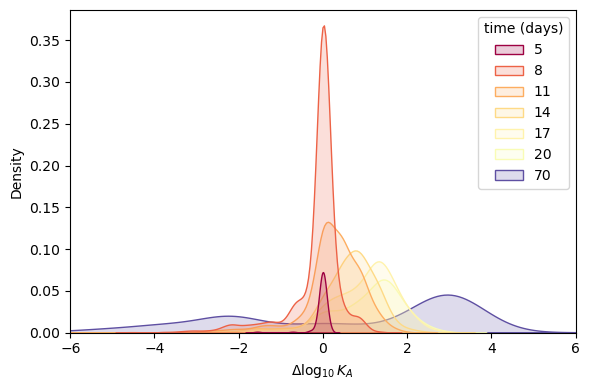

In [62]:
import matplotlib


plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x="delta_bind_CGG", hue="time (days)",
            palette="Spectral",
            common_norm=True, common_grid=False,
            hue_norm=matplotlib.colors.LogNorm(vmin=order[0], vmax=order[-1]),
            fill=True, alpha=0.2,
            # bw_adjust=0.5
            )
plt.xlim(-6, 6)
plt.xlabel("$\Delta\log_{10} K_A$")
plt.tight_layout()
plt.savefig("output/10x/affinity_kde.pdf")
plt.show()

/var/folders/0w/l84hyz3n6ns582pxy6tkt8y80000gn/T/ipykernel_54843/2648018424.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.displot(data=df, kind="kde", x="delta_bind_CGG", row="time (days)", hue="mouse", row_order=order, fill=True,
/var/folders/0w/l84hyz3n6ns582pxy6tkt8y80000gn/T/ipykernel_54843/2648018424.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.displot(data=df, kind="kde", x="delta_bind_CGG", row="time (days)", hue="mouse", row_order=order, fill=True,
/var/folders/0w/l84hyz3n6ns582pxy6tkt8y80000gn/T/ipykernel_54843/2648018424.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.displot(data=df, kind="kde", x="delta_bind_CGG", row="time (days)", hue="mouse", row_order=order, fill=True,


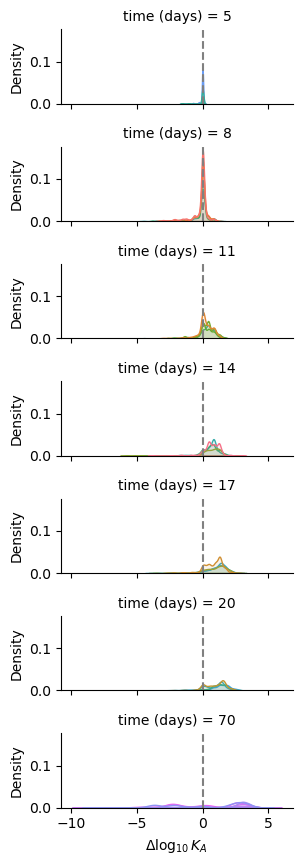

In [29]:
g = sns.displot(data=df, kind="kde", x="delta_bind_CGG", row="time (days)", hue="mouse", row_order=order, fill=True,
                common_norm=True,
                alpha=0.1, bw_adjust=0.5,
                height=1.25, aspect=2.5, legend=False)
# plt.xlim(-3, 3)
plt.xlabel("$\Delta\log_{10} K_A$")
for ax in g.axes.flatten():
    ax.axvline(0, color="grey", linestyle="--")
plt.tight_layout()
plt.savefig("output/10x/affinity_kde_stratified.pdf")
plt.show()

/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key

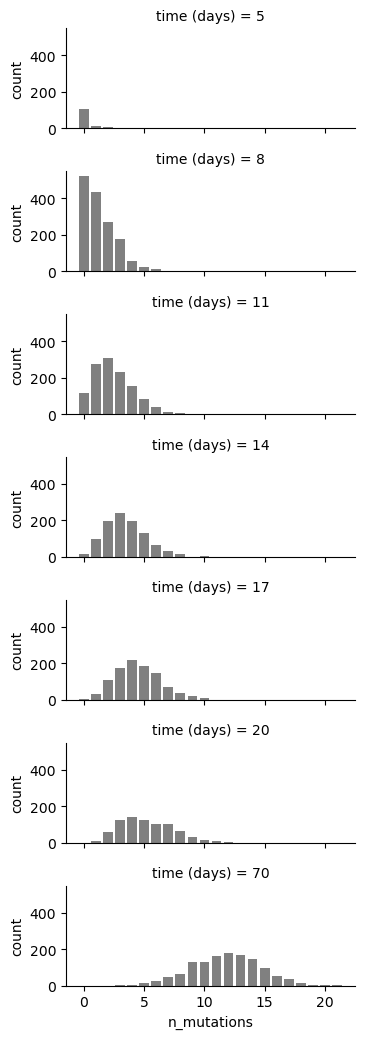

In [30]:
sns.catplot(kind="count", data=df, x="n_mutations", row="time (days)", color="grey", native_scale=True,row_order=order, aspect=2.5, height=1.5, legend=False)
plt.show()

In [31]:
df.groupby("time (days)").delta_bind_CGG.mean().loc[order]

time (days)
5    -0.053789
8    -0.163295
11    0.217296
14    0.570271
17    0.914478
20    0.995028
70    0.622494
Name: delta_bind_CGG, dtype: float64

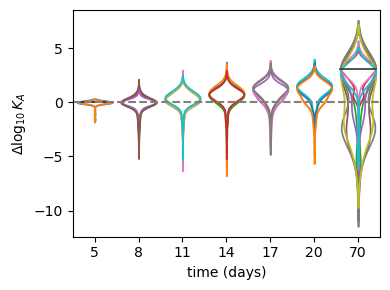

In [32]:
plt.figure(figsize=(4, 3))
ax = sns.violinplot(data=df, y="delta_bind_CGG", x="time (days)",
                    hue=df.mouse.str.split("M").str[-1],
                    dodge=False,
                    inner=None,
                    common_norm=True,
                    density_norm="width",
                    # linewidth=1,
                    # width=1.0,
                    bw_method=0.5,
                    )
for i, coll in enumerate(ax.collections):
    coll.set_facecolor((0, 0, 0, 0))
    coll.set_edgecolor(f"C{i}")
# sns.lineplot(data=df.groupby("time (days)").delta_bind_CGG.median().loc[order],
#              color="black", linewidth=2)
plt.axhline(0, color="grey", linestyle="--")
# put more space on the right
# plt.xlim(-0.5, 5.5)
# plt.ylim(-5, 5)
plt.ylabel("$\Delta\log_{10} K_A$")
plt.legend().remove()
plt.tight_layout()
plt.savefig("output/10x/affinity_violin.pdf")
plt.show()

/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


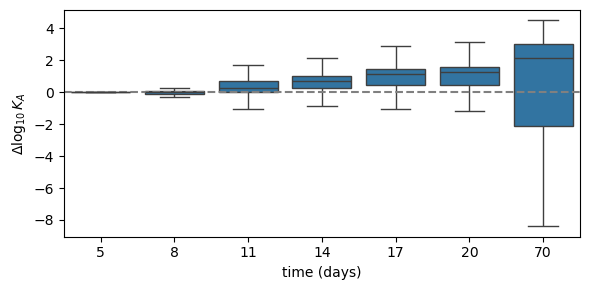

In [33]:
plt.figure(figsize=(6, 3))
ax = sns.boxplot(data=df, y="delta_bind_CGG", x="time (days)",
                #  hue=df.mouse.str.split("M").str[-1],
                 order=order,
                 fliersize=0,
                #  dodge=True,
                 )
for i, coll in enumerate(ax.collections):
    coll.set_facecolor((0, 0, 0, 0))
    coll.set_edgecolor(f"C{i}")
# sns.lineplot(data=df.groupby("time (days)").delta_bind_CGG.median().loc[order],
#              color="black", linewidth=2)
plt.axhline(0, color="grey", linestyle="--")
# put more space on the right
# plt.xlim(-0.5, 5.5)
# plt.ylim(-2, 3)
plt.ylabel("$\Delta\log_{10} K_A$")
# plt.legend().remove()
plt.tight_layout()
plt.show()

/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key

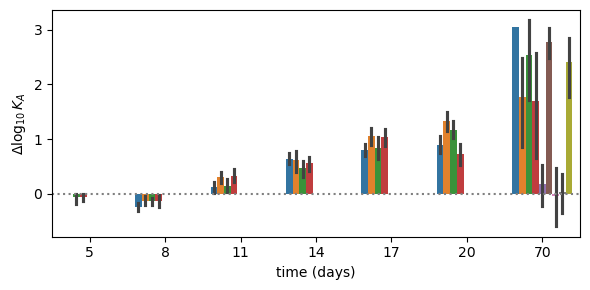

In [34]:
# plot mean of each mouse at each time
plt.figure(figsize=(6, 3))
sns.barplot(data=df, x="time (days)", y="delta_bind_CGG",
            errorbar=("ci", 99),
            hue=df.mouse.str.split("M").str[-1],
            order=order,
            # palette='light:C0',
            )
plt.legend().remove()
plt.axhline(0, color="grey", linestyle=":")
plt.ylabel("$\Delta\log_{10} K_A$")
plt.tight_layout()
plt.savefig("output/10x/affinity_bar.pdf")
plt.show()

In [35]:
summary_df = df.groupby(["mouse", "time (days)"]).aggregate({"delta_bind_CGG": [np.mean, np.std, "size"]}).sort_values("time (days)")
summary_df.columns = ["mean", "std", "n"]
summary_df.to_csv("output/10x/affinity_mean_std.csv")

/var/folders/0w/l84hyz3n6ns582pxy6tkt8y80000gn/T/ipykernel_54843/3208066279.py:1: FutureWarning: The provided callable <function mean at 0x1068b5bc0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  summary_df = df.groupby(["mouse", "time (days)"]).aggregate({"delta_bind_CGG": [np.mean, np.std, "size"]}).sort_values("time (days)")
/var/folders/0w/l84hyz3n6ns582pxy6tkt8y80000gn/T/ipykernel_54843/3208066279.py:1: FutureWarning: The provided callable <function std at 0x1068b5d00> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  summary_df = df.groupby(["mouse", "time (days)"]).aggregate({"delta_bind_CGG": [np.mean, np.std, "size"]}).sort_values("time (days)")


In [36]:
df.groupby("time (days)").size()

time (days)
5      126
8     1499
11    1225
14    1005
17    1011
20     780
70    1264
dtype: int64

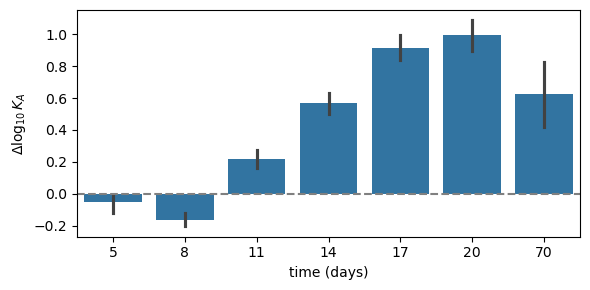

In [37]:
plt.figure(figsize=(6, 3))
ax = sns.barplot(data=df, y="delta_bind_CGG", x="time (days)",
                #  hue=df.mouse.str.split("M").str[-1],
                 order=order,
                 errorbar=("ci", 99),
                #  fliersize=0,
                #  dodge=True,
                 )
for i, coll in enumerate(ax.collections):
    coll.set_facecolor((0, 0, 0, 0))
    coll.set_edgecolor(f"C{i}")
# sns.lineplot(data=df.groupby("time (days)").delta_bind_CGG.median().loc[order],
#              color="black", linewidth=2)
plt.axhline(0, color="grey", linestyle="--")
plt.ylabel("$\Delta\log_{10} K_A$")
# plt.legend().remove()
plt.tight_layout()
plt.show()

In [38]:
df.groupby(["time (days)", "mouse"]).size()

time (days)  mouse
5            D5M1       3
             D5M2      43
             D5M3      77
             D5M4       3
8            D8M1     477
             D8M2     344
             D8M3     284
             D8M4     394
11           D11M1    395
             D11M2    252
             D11M3    252
             D11M4    326
14           D14M1    306
             D14M2    248
             D14M3    263
             D14M4    188
17           D17M1    350
             D17M2    225
             D17M3    233
             D17M4    203
20           D20M1    252
             D20M2    167
             D20M3    206
             D20M4    155
70           D70M1      1
             D70M2     12
             D70M3     42
             D70M4     78
             D70M5    228
             D70M6    368
             D70M7     36
             D70M8    139
             D70M9    360
dtype: int64

In [39]:
summary_stats = df.groupby(["time (days)", "mouse"]).delta_bind_CGG.aggregate(["size", "median", "mean", "var"]).loc[order].reset_index()

# rename columns
summary_stats.rename(columns={"size": "n cells", "median": "affinity median", "mean": "affinity mean", "var": "affinity variance"}, inplace=True)

# drop samples with less than 10 measurements
summary_stats = summary_stats.loc[summary_stats["n cells"] >= 10]

summary_stats

,time (days),mouse,n cells,affinity median,affinity mean,affinity variance
1,5,D5M2,43,0.000000,-0.062857,0.079375
2,5,D5M3,77,0.000000,-0.052916,0.048552
4,8,D8M1,477,0.000000,-0.233459,0.465718
5,8,D8M2,344,0.000000,-0.138101,0.290987
6,8,D8M3,284,0.000000,-0.123083,0.508572
7,8,D8M4,394,0.000000,-0.129332,0.407439
8,11,D11M1,395,0.125717,0.121639,0.688952
9,11,D11M2,252,0.137788,0.146307,0.565380
10,11,D11M3,252,0.441930,0.329658,0.606615
11,11,D11M4,326,0.392997,0.301217,0.509293


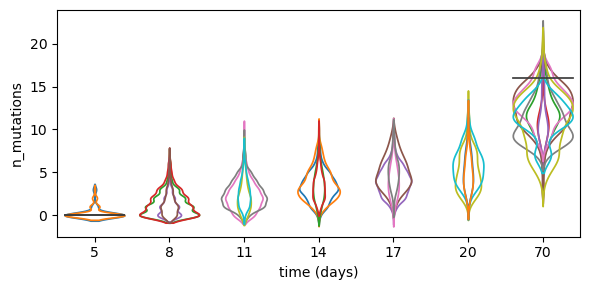

In [52]:
plt.figure(figsize=(6, 3))
ax = sns.violinplot(data=df, y=df.n_mutations.astype(float), x="time (days)", hue=df.mouse.str.split("M").str[-1], order=order, dodge=False, inner=None)
for i, coll in enumerate(ax.collections):
    coll.set_facecolor((0, 0, 0, 0))
    coll.set_edgecolor(f"C{i}")
plt.legend().remove()
plt.tight_layout()
plt.savefig("output/10x/mutations_violin.pdf")
plt.show()

In [41]:
df.groupby("time (days)").size()

time (days)
5      126
8     1499
11    1225
14    1005
17    1011
20     780
70    1264
dtype: int64

In [42]:
df.groupby(["n_mutations", "time (days)"]).size()

n_mutations  time (days)
0            5              104
             8              522
             11             118
             14              15
             17               4
                           ... 
17           70              34
18           70              14
19           70               2
20           70               3
21           70               1
Length: 77, dtype: int64

### Plots using number of mutations instead of time

In [43]:
df["n_mutations_chunked"] = df.n_mutations.map(lambda x: f"{x}" if x < 8 else "8+")

In [44]:
foo_order = sorted(df["n_mutations_chunked"].unique(), key=lambda x: int(x.split("+")[0]))

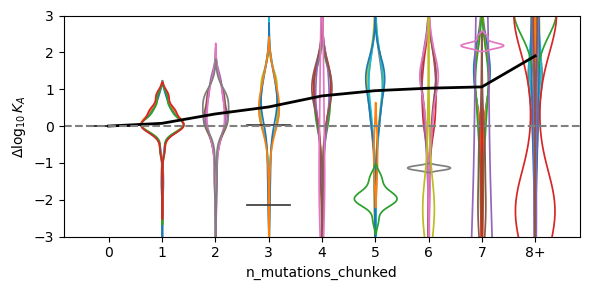

In [45]:
plt.figure(figsize=(6, 3))
ax = sns.violinplot(data=df, y="delta_bind_CGG", x="n_mutations_chunked", order=foo_order, hue=df.mouse.str.split("M").str[-1], dodge=False, inner=None)
for i, coll in enumerate(ax.collections):
    coll.set_facecolor((0, 0, 0, 0))
    coll.set_edgecolor(f"C{i}")
sns.lineplot(data=df.groupby("n_mutations_chunked").delta_bind_CGG.median(),
             color="black", linewidth=2)
plt.axhline(0, color="grey", linestyle="--")
# put more space on the right
# plt.xlim(-0.5, 5.5)
plt.ylim(-3, 3)
plt.ylabel("$\Delta\log_{10} K_A$")
plt.legend().remove()
plt.tight_layout()
plt.savefig("output/10x/affinity_violin_mutations.pdf")
plt.show()

/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/var/folders/0w/l84hyz3n6ns582pxy6tkt8y80000gn/T/ipykernel_54843/1882792410.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x="delta_bind_CGG", hue="n_mutations_chunked", hue_order=foo_order, fill=True, common_norm=False, alpha=0.1, bw_adjust=0.6)
/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_g

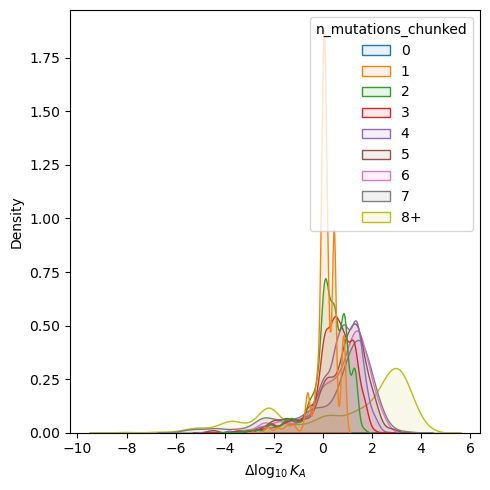

In [46]:
plt.figure(figsize=(5, 5))
sns.kdeplot(data=df, x="delta_bind_CGG", hue="n_mutations_chunked", hue_order=foo_order, fill=True, common_norm=False, alpha=0.1, bw_adjust=0.6)
# plt.xlim(-3, 3)
plt.xlabel("$\Delta\log_{10} K_A$")
plt.tight_layout()
plt.savefig("output/10x/affinity_kde_mutations.pdf")
plt.show()

## Write data frame to file

In [47]:
df.to_csv("output/10x/data.csv", index=False)